# **15. Introducción a las redes neuronales convolucionales**

### Objetivos
Que la o el estudiante aprenda a utilizar redes neuronales convolucionales usando Kearas en Tensorflow.

### Descripción del procedimiento a seguir
- Se crea una arquitectura sencilla para una predicción multiclase con el conjunto de datos Fashion MNIST.


### Datos
**Profesora**: Dra. Jessica Beltrán Márquez<br>
Maestría en Ciencia de Datos y Optimización<br>
Centro de Investigación en Matemáticas Aplicadas <br>
Universidad Autónoma de Coahuila


### Bibliografía
1. https://www.tensorflow.org/guide/keras?hl=es-419


Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

 Load and Preprocess the Fashion MNIST Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

'''Convolutional layers in TensorFlow and Keras expect input images to have a
 specific shape, typically [batch_size, height, width, channels].
  The channels dimension is crucial because it specifies
   the number of color channels in the image. For grayscale images,
    this number is 1, whereas for RGB images, it is 3.'''
# Reshape the images to include a channel dimension
train_images = train_images[..., np.newaxis] #Ellipsis (...): In Python, the ellipsis is used as a shortcut to mean "everything in the preceding dimensions."
test_images = test_images[..., np.newaxis] #np.newaxis: This is a special object used in NumPy (and by extension, TensorFlow,
#which can interoperate with NumPy arrays) to add a new axis to an array. When used in indexing, it inserts a new axis, effectively increasing the dimensions of the array by one.

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
num_classes = len(np.unique(train_labels))
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes)

Define the CNN Model

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Compile the Model

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [6]:
history = model.fit(train_images, train_labels_one_hot, epochs=2, validation_split=0.2)


Epoch 1/2
1500/1500 [==============================] - 48s 31ms/step - loss: 0.4834 - accuracy: 0.8260 - val_loss: 0.3509 - val_accuracy: 0.8769
Epoch 2/2
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3225 - accuracy: 0.8824 - val_loss: 0.3428 - val_accuracy: 0.8769


 Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 2s - loss: 0.3323 - accuracy: 0.8820 - 2s/epoch - 8ms/step

Test accuracy: 0.8820000290870667


Show Examples of Images

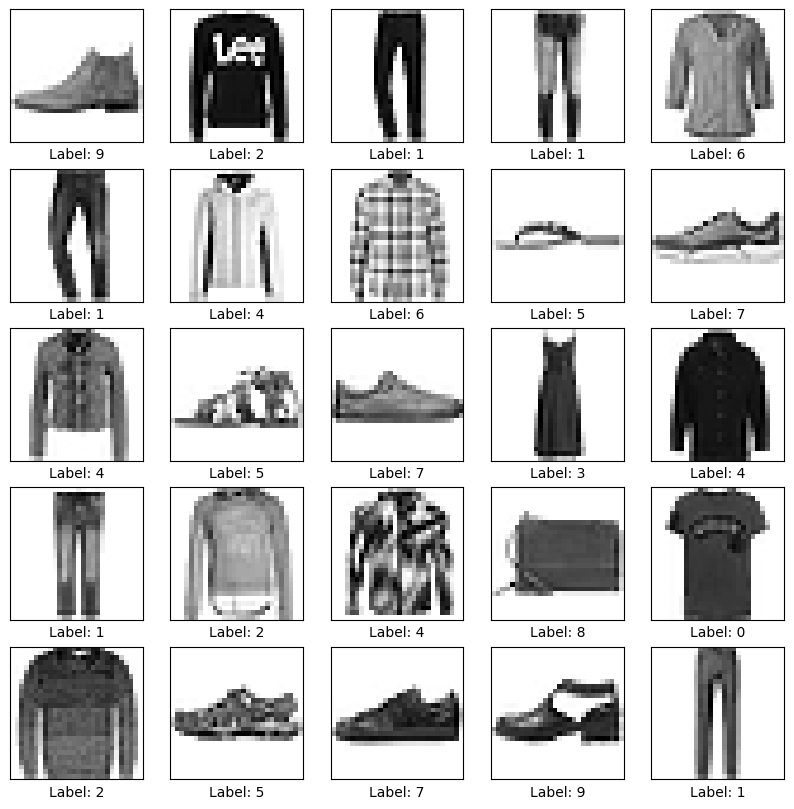

In [ ]:
def display_images(images, labels, predictions=None):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        if predictions is None:
            plt.xlabel(f"Label: {labels[i]}")
        else:
            plt.xlabel(f"True: {labels[i]}, Pred: {predictions[i]}")
    plt.show()

# Display some images from the test set
display_images(test_images, test_labels)


Visualize Correctly and Incorrectly Classified Images

313/313 [==============================] - 3s 10ms/step
Correctly classified images:


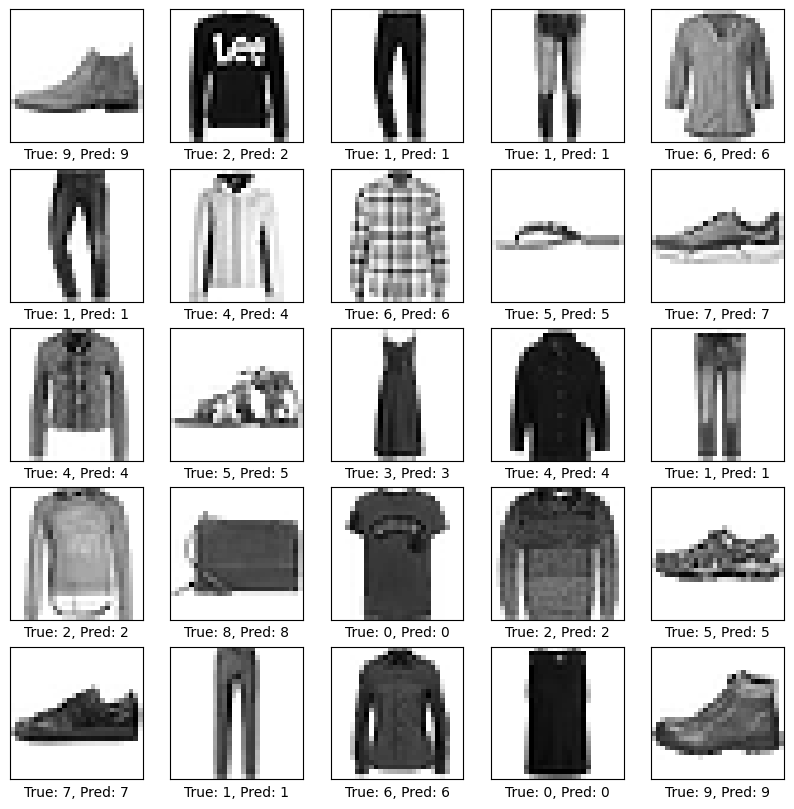

Incorrectly classified images:


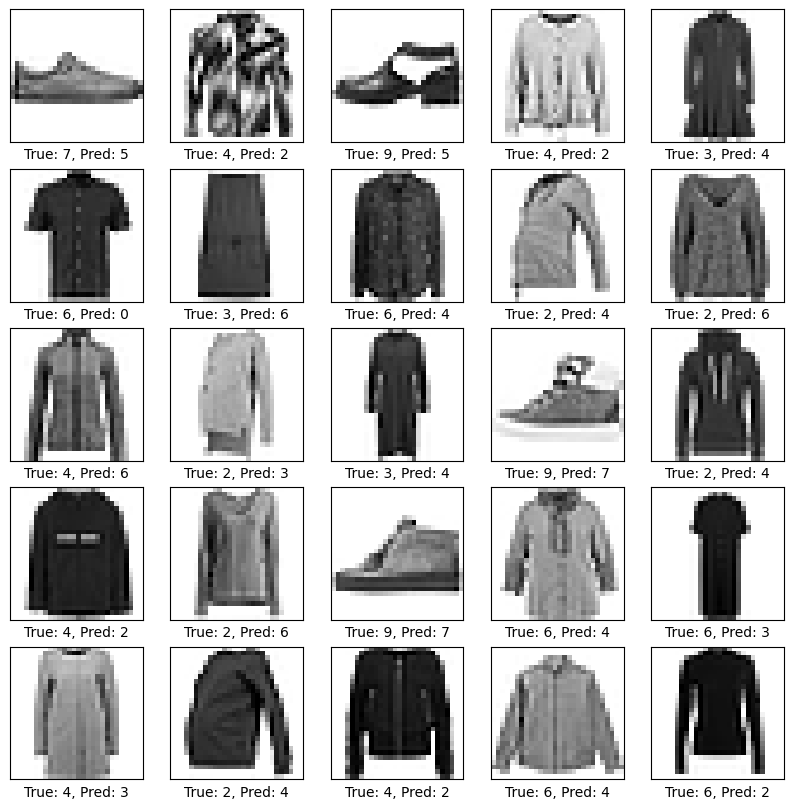

In [ ]:
# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Find correctly and incorrectly classified examples
correct_indices = np.where(predicted_labels == test_labels)[0]
incorrect_indices = np.where(predicted_labels != test_labels)[0]

# Display correctly classified images
print("Correctly classified images:")
display_images(test_images[correct_indices], test_labels[correct_indices], predicted_labels[correct_indices])

# Display incorrectly classified images
print("Incorrectly classified images:")
display_images(test_images[incorrect_indices], test_labels[incorrect_indices], predicted_labels[incorrect_indices])
